#AI Group Project ~ Deep Learning

##Prediction of Pumpkin Seed Type



Dataset ini berisi 2.500 data dan 13 features. Terdapat dua jenis biji labu, yaitu 'Urgup_Sivrisi' dan 'Cercevelik' yang umumnya ditanam di daerah Urgup dan Karacaoren di Turki. Project ini dilakukan untuk dapat mengklasifikasi jenis biji labu dengan data-data yang telah ada. Dataset diambil dari link https://www.kaggle.com/datasets/muratkokludataset/pumpkin-seeds-dataset

In [2]:
#@title Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
import math
from collections import defaultdict
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import os
import seaborn as sns
import re
from numpy import random
from sklearn import preprocessing
import random
from random import seed
from random import randrange
from csv import reader
from math import sqrt
import csv
from tqdm import tqdm
from joblib import Parallel, delayed
from scipy.stats import f as F_distribution
import scipy.stats as stats
from scipy.special import expit
!pip install kaggle #For importing from Kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import files #For kaggle key
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sstarchange","key":"135de53606e44830e48536852b1d5dc7"}'}

In [4]:
!mkdir ~/.kaggle #Makes directory to store key
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d muratkokludataset/pumpkin-seeds-dataset/code #Downloads dataset
!unzip pumpkin-seeds-dataset.zip #Unzips dataset

100% 393k/393k [00:00<00:00, 546kB/s]
100% 393k/393k [00:00<00:00, 546kB/s]
Archive:  pumpkin-seeds-dataset.zip
  inflating: Pumpkin_Seeds_Dataset/Pumpkin_Seeds_Dataset.arff  
  inflating: Pumpkin_Seeds_Dataset/Pumpkin_Seeds_Dataset.xlsx  
  inflating: Pumpkin_Seeds_Dataset/Pumpkin_Seeds_Dataset_Citation_Request.txt  


In [6]:
real = pd.read_excel('/content/drive/MyDrive/Datasets/Pumpkin_Seeds_Dataset.xlsx')
gan = pd.read_csv('/content/drive/MyDrive/Datasets/5000_Pumpkin_Seeds_GAN_Dataset.csv')

concatenate = pd.concat([real, gan])
concatenate.tail(10)

class_map = {'Çerçevelik': 1, 'Ürgüp Sivrisi':2}
concatenate['Class'] = concatenate['Class'].replace(class_map)

data = concatenate[['Area',	'Perimeter',	'Major_Axis_Length',	'Minor_Axis_Length', 'Convex_Area',	'Equiv_Diameter',	'Eccentricity',	'Solidity',	'Extent',	'Roundness',	'Aspect_Ration',	'Compactness',	'Class']]
print(data.shape)
data.tail(10)

(7500, 13)


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
4990,71041,1127.5199,428.02945,274.43870,80258,379.73315,0.596869,0.932685,0.533533,0.765213,2.154492,0.773263,1
4991,53736,1167.8882,390.58655,248.50845,70640,385.97400,0.655005,0.935849,0.575175,0.780027,2.165465,0.807173,0
4992,86582,1127.6531,421.76147,298.69424,86601,362.46667,0.622573,0.936295,0.582196,0.728349,1.659233,0.755153,1
4993,104993,1265.4141,478.35687,287.78998,92970,312.24432,0.656063,0.951647,0.632103,0.681130,1.530717,0.687326,1
4994,55787,1074.8579,420.03342,255.99118,68387,384.42584,0.629468,0.935547,0.535280,0.792258,2.277966,0.761318,1
4995,70415,1155.8036,418.09020,289.29290,76340,370.24243,0.602830,0.930423,0.535034,0.760331,1.810571,0.741103,1
4996,90195,1296.4999,458.21585,276.46655,83805,321.62872,0.651667,0.942690,0.581542,0.687192,1.626000,0.683103,1
4997,72713,1071.2563,479.34576,212.25452,68820,356.39480,0.696356,0.937712,0.605875,0.740397,2.792032,0.737174,0
4998,76544,1172.8456,432.22098,227.43350,75017,349.18420,0.586717,0.944879,0.568123,0.740454,2.236784,0.762664,0
4999,77824,1029.4976,388.96400,248.38828,60308,377.52070,0.737149,0.949102,0.602484,0.744349,2.160608,0.739347,1


In [7]:
has_null = data.isnull().values.any() #Checks if there is null values in the new data

if has_null:
    print("Data contains null values")
else:
    print("Data does not contain null values")

Data does not contain null values


In [8]:
#The first line selects specific columns from the DataFrame data and assigns them to the variable dataforanova
#The next line extracts the column names from the dataforanova DataFrame and assigns them to the variable X_feature as a list. This can be useful for reference or further processing of the selected features
dataforanova = data[['Area',	'Perimeter',	'Major_Axis_Length',	'Minor_Axis_Length', 'Convex_Area',	'Equiv_Diameter',	'Eccentricity',	'Solidity',	'Extent',	'Roundness',	'Aspect_Ration',	'Compactness']]

# Saving features names
X_feature = list(dataforanova.columns.values)
X_feature

['Area',
 'Perimeter',
 'Major_Axis_Length',
 'Minor_Axis_Length',
 'Convex_Area',
 'Equiv_Diameter',
 'Eccentricity',
 'Solidity',
 'Extent',
 'Roundness',
 'Aspect_Ration',
 'Compactness']

In [9]:
#Assign value to X and y for later purposes
X = dataforanova.values
y = data['Class'].values

[index  0 ] Area :  189.542594874
[index  1 ] Perimeter :  50.40593002865844
[index  2 ] Major_Axis_Length :  1118.5592865670692
[index  3 ] Minor_Axis_Length :  1211.2010618859217
[index  4 ] Convex_Area :  209.40332257455034
[index  5 ] Equiv_Diameter :  466.32754686138037
[index  6 ] Eccentricity :  2287.4243156169787
[index  7 ] Solidity :  1429.6531679095126
[index  8 ] Extent :  382.08838370863043
[index  9 ] Roundness :  15.102939945956642
[index  10 ] Aspect_Ration :  981.238532055529
[index  11 ] Compactness :  1493.9949908924311


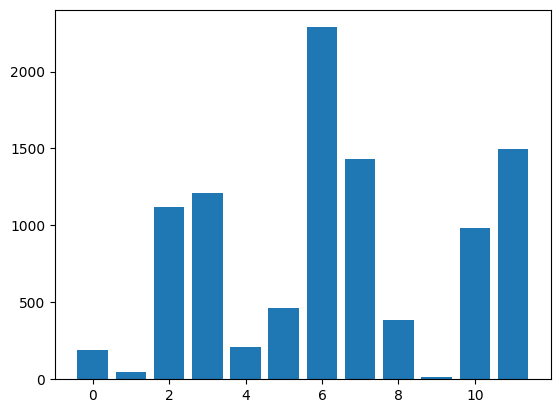

In [10]:
# ANOVA

# taking f-value
def f_classif_manual(X, y):
    classes = np.unique(y)
    k = 12
    class_means = []
    class_vars = []
    overall_mean = np.mean(X, axis=0)
    SST = np.sum((X - overall_mean) ** 2)

    for c in classes:
        X_c = X[y == c]
        class_means.append(np.mean(X_c, axis=0))
        class_vars.append(np.sum((X_c - class_means[-1]) ** 2))

    SSB = np.sum((class_means - overall_mean) ** 2)
    SSW = np.sum(class_vars)

    MSB = SSB / (len(classes) - 1)
    MSW = SSW / (X.shape[0] - len(classes))

    F = MSB / MSW
    p_value = 1 - F_distribution.cdf(F, len(classes) - 1, X.shape[0] - len(classes))

    return F, p_value

def select_features(X, y):
    num_features = X.shape[1]
    F_values = np.zeros(num_features)
    p_values = np.zeros(num_features)

    for i in range(num_features):
        X_i = np.reshape(X[:, i], (-1, 1))
        F_values[i], p_values[i] = f_classif_manual(X_i, y)

    return F_values, p_values

F_values, p_values = select_features(X, y)

# multiplying f-value with 1000 so the difference between bar in graph is clearer
F_values = F_values*1000

for i in range(len(F_values)):
 print("[index ", i, "]", X_feature[i], ": ", F_values[i])

plt.bar([i for i in range(len(F_values))], F_values)
plt.show()

In [11]:
X = X[:, [2, 3, 6, 7, 10, 11]] #Selects specific columns from the array X and assigns the result to X.
X

array([[326.1485    , 220.2388    ,   0.7376    ,   0.9902    ,
          1.4809    ,   0.8207    ],
       [417.1932    , 234.2289    ,   0.8275    ,   0.9916    ,
          1.7811    ,   0.7487    ],
       [435.8328    , 211.0457    ,   0.8749    ,   0.9857    ,
          2.0651    ,   0.6929    ],
       ...,
       [479.34576   , 212.25452   ,   0.6963555 ,   0.93771154,
          2.7920325 ,   0.73717415],
       [432.22098   , 227.4335    ,   0.5867166 ,   0.9448789 ,
          2.2367842 ,   0.7626641 ],
       [388.964     , 248.38828   ,   0.737149  ,   0.9491024 ,
          2.1606078 ,   0.73934686]])

In [12]:
y = data['Class'].values #Assigns value to y
y

array([1, 1, 1, ..., 0, 0, 1])

In [13]:
#Splits the dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
#@title XGB AI

class XGBoostTree:
    def __init__(self, max_depth=3, min_samples_split=2):
        self.max_depth = max_depth  # Initialize tree attributes
        self.min_samples_split = min_samples_split
        self.left = None
        self.right = None
        self.feature_idx = None
        self.threshold = None
        self.value = None

    def fit(self, X, gradient, hessian, depth=0):
        if depth == self.max_depth or len(X) < self.min_samples_split:
            self.value = self.compute_gamma(gradient, hessian)  # Check if stopping criteria are met
            return

        best_gain = 0.0  # Find the best feature and threshold to split the data
        best_feature_idx = None
        best_threshold = None
        for feature_idx in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_idx])
            for threshold in thresholds:
                gain = self.compute_gain(X, gradient, hessian, feature_idx, threshold)
                if gain > best_gain:
                    best_gain = gain
                    best_feature_idx = feature_idx
                    best_threshold = threshold

        if best_gain == 0.0:
            self.value = self.compute_gamma(gradient, hessian)  # If no gain is achieved, set the leaf node value
            return

        self.feature_idx = best_feature_idx
        self.threshold = best_threshold

        left_mask = X[:, best_feature_idx] <= best_threshold  # Split the data based on the best feature and threshold
        right_mask = X[:, best_feature_idx] > best_threshold

        self.left = XGBoostTree(self.max_depth, self.min_samples_split)
        self.left.fit(X[left_mask], gradient[left_mask], hessian[left_mask], depth + 1)  # Recursively fit the left and right subtrees

        self.right = XGBoostTree(self.max_depth, self.min_samples_split)
        self.right.fit(X[right_mask], gradient[right_mask], hessian[right_mask], depth + 1)

    def compute_gamma(self, gradient, hessian):
        return -np.sum(gradient) / (np.sum(hessian) + 1e-10)  # Compute the gamma value for the leaf node

    def compute_gain(self, X, gradient, hessian, feature_idx, threshold):
        left_mask = X[:, feature_idx] <= threshold
        right_mask = X[:, feature_idx] > threshold

        left_gradient = gradient[left_mask]
        left_hessian = hessian[left_mask]
        right_gradient = gradient[right_mask]
        right_hessian = hessian[right_mask]

        gain = 0.5 * (
            (np.sum(left_gradient) ** 2) / (np.sum(left_hessian) + 1e-10) +
            (np.sum(right_gradient) ** 2) / (np.sum(right_hessian) + 1e-10) -
            ((np.sum(left_gradient) + np.sum(right_gradient)) ** 2) /
            (np.sum(left_hessian) + np.sum(right_hessian) + 1e-10)
        )  # Compute the gain for a potential split

        return gain

    def predict(self, X):
        if self.value is not None:
            return np.full(len(X), self.value)  # Make predictions for the input data

        left_mask = X[:, self.feature_idx] <= self.threshold
        right_mask = X[:, self.feature_idx] > self.threshold

        y_pred = np.zeros(len(X))
        y_pred[left_mask] = self.left.predict(X[left_mask])
        y_pred[right_mask] = self.right.predict(X[right_mask])

        return y_pred


class XGBoostClassifier:
    def __init__(self, params):
        self.params = params
        self.n_estimators = params.get('n_estimators', 100)
        self.learning_rate = params.get('learning_rate', 0.1)
        self.max_depth = params.get('max_depth', 3)
        self.min_samples_split = params.get('min_samples_split', 2)
        self.estimators = []

    @staticmethod
    def sigmoid(x):
        return expit(x)  # Sigmoid function

    def log_loss_gradient(self, y, y_pred):
        return self.sigmoid(y_pred) - y  # Compute the gradient for log loss

    def log_loss_hessian(self, y, y_pred):
        preds = self.sigmoid(y_pred)
        return preds * (1 - preds)  # Compute the Hessian for log loss

    def fit(self, X, y):
        y_pred = np.zeros_like(y, dtype=float)
        for _ in range(self.n_estimators):
            tree = XGBoostTree(self.max_depth, self.min_samples_split)
            gradient = self.log_loss_gradient(y, y_pred)
            hessian = self.log_loss_hessian(y, y_pred)
            tree.fit(X, gradient, hessian)
            y_pred += self.learning_rate * tree.predict(X)
            self.estimators.append(tree)

    def predict_proba(self, X):
        y_pred = np.zeros(len(X))
        for estimator in self.estimators:
            y_pred += self.learning_rate * estimator.predict(X)

        proba = self.sigmoid(y_pred)
        return np.column_stack((1 - proba, proba))  # Predict class probabilities for the input data

    def predict(self, X):
        proba = self.predict_proba(X)
        return np.argmax(proba, axis=1)  # Predict class labels for the input data

    def kfold_cross_validation(self, X, y, k=5):
        accuracy_scores = []
        kf = KFold(n_splits=k)

        progress_bar = tqdm(total=k, desc="K-Fold Progress")  # Progress bar for k-fold iterations

        for train_index, val_index in kf.split(X):
            X_train, X_val = X[train_index], X[val_index]
            y_train, y_val = y[train_index], y[val_index]

            xgb_model = XGBoostClassifier(self.params)
            xgb_model.fit(X_train, y_train)
            y_pred = xgb_model.predict(X_val)
            accuracy = accuracy_score(y_val, y_pred)
            accuracy_scores.append(accuracy)

            progress_bar.update(1)
            progress_bar.set_postfix({"Accuracy": accuracy})

        progress_bar.close()

        average_accuracy = np.mean(accuracy_scores)
        return average_accuracy


In [15]:
#@title n-Iterated K-Fold Cross Validation with Shuffled Datas

params = {
    'n_estimators': 10,
    'learning_rate': 0.1,
    'max_depth': 7,
    'min_samples_split': 2
}

X = X_train # Your input data
y = y_train  # Your target variable
k = 5  # Number of folds
n = 5   # Number of iterations

average_accuracies = []

progress_bar_outer = tqdm(total=n, desc="Iteration Progress")  # Outer progress bar

for _ in range(n):
    # Creates K-fold CV with random shuffling
    kf = KFold(n_splits=k, shuffle=True)

    accuracy_scores = []  # Accuracy scores for each fold

    progress_bar_inner = tqdm(total=k, desc="K-Fold Progress", leave=False)  # Inner progress bar

    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        # Train and evaluate your model on each fold
        xgb_model = XGBoostClassifier(params)
        xgb_model.fit(X_train, y_train)
        y_pred = xgb_model.predict(X_val)

        # Compute the accuracy score for the fold
        accuracy = accuracy_score(y_val, y_pred)
        accuracy_scores.append(accuracy)

        progress_bar_inner.set_postfix({"Accuracy": accuracy})
        progress_bar_inner.update(1)

    progress_bar_inner.close()

    # Compute average accuracy across all folds for THIS iteration
    average_accuracy = np.mean(accuracy_scores)
    average_accuracies.append(average_accuracy)

    progress_bar_outer.set_postfix({"Average Accuracy": average_accuracy})
    progress_bar_outer.update(1)

progress_bar_outer.close()

# Compute average accuracy across ALL iterations
overall_average_accuracy = np.mean(average_accuracies)

# Print overall average accuracy
print("Overall Average Accuracy:", overall_average_accuracy)

Iteration Progress: 100%|██████████| 5/5 [1:14:26<00:00, 893.29s/it, Average Accuracy=0.753]

Overall Average Accuracy: 0.7516666666666667


In [17]:
#@title t-test

results = {
    'Before':[0.874, 0.878, 0.879, 0.883, 0.883],
    'After': [0.753, 0.752, 0.749, 0.752, 0.753],
}
t_statistics, p_value = stats.ttest_ind(results['Before'], results['After']) # Determine if there is a statistically significant difference between the mean performance of the "Before" and "After" conditions

if p_value < 0.05:  # Assuming a significance level of 0.05
    print("Reject H0: result after GAN and feature selection has significantly lesser accuracy than before after GAN and feature selection.")
else:
    print("Fail to reject H0: result after GAN and feature selection has greater or equal accuracy compared to result before GAN and feature selection.")

print("p value:", p_value) #Prints p-value

Reject H0: result after GAN and feature selection has significantly lesser accuracy than before after GAN and feature selection.
p value: 2.1169887582304595e-12
